In [1]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import matplotlib.dates as mdates  # Matplotlib's dates module for handling dates
from datetime import datetime  # Datetime module for datetime operations
from scipy import stats  # Scipy for statistical computations
import numpy as np  # NumPy for numerical computations
from sklearn.metrics import mean_squared_error, r2_score  # Scikit-learn's metrics for regression
import numpy as np  # NumPy for numerical computations
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler
from sklearn.cluster import KMeans  # Scikit-learn's KMeans clustering
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler
from pandas.plotting import parallel_coordinates  # Pandas' parallel_coordinates for plotting
from sklearn.decomposition import PCA  # Scikit-learn's PCA
from sklearn.metrics import silhouette_score  # Scikit-learn's silhouette_score
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for statistical data visualization
from sklearn.model_selection import train_test_split  # Scikit-learn's train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Scikit-learn's StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Scikit-learn's metrics for regression




C:\Users\kavya\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
energy_data = pd.read_csv('PROCESSED-Energy-Dataset-192-FINAL (1).csv',encoding= 'unicode_escape')
# Load the weather dataset
weather_data=pd.read_csv('Hourly-Weather-Data-Final.csv',encoding= 'unicode_escape') # Read weather dataset into a Pandas DataFrame

In [3]:
energy_data.head(10)

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,2.00 PM,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM
0,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,1/01/2022,9.32,...,1.39,0.12,0.12,1.03,0.12,0.13,0.14,0.14,0.14,0.63
1,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2/01/2022,9.19,...,0.75,0.92,0.12,0.12,0.12,1.04,0.14,0.14,0.14,0.14
2,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,3/01/2022,9.57,...,0.12,2.01,0.55,0.12,0.13,0.14,0.14,0.14,1.03,0.14
3,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,4/01/2022,8.63,...,0.12,0.29,1.25,0.12,1.03,0.14,0.14,0.14,0.14,0.14
4,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,5/01/2022,9.58,...,1.01,1.08,0.57,0.12,0.14,0.14,0.14,1.04,0.14,0.14
5,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,6/01/2022,8.88,...,0.12,0.12,1.61,1.06,0.12,0.13,0.14,0.14,0.14,0.26
6,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,7/01/2022,9.52,...,0.12,0.12,0.12,1.52,0.12,0.79,0.44,0.14,0.14,0.14
7,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,8/01/2022,9.76,...,0.12,0.12,1.06,0.12,1.11,0.56,0.14,0.14,0.14,1.07
8,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,9/01/2022,8.72,...,0.12,0.12,0.12,0.12,0.51,0.77,1.44,0.14,0.14,0.14
9,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,10/01/2022,9.70,...,0.12,1.06,0.12,0.12,0.12,0.13,0.14,1.56,1.07,0.14


In [4]:
# Preprocessing the energy dataset
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Assuming the 'DATE(dd/mm/yy)' and 'TIME' columns in the weather dataset are named as such
# and replacing '.' with ':' in the 'TIME' column to correct the format
weather_data['TIME'] = weather_data['TIME'].str.replace('.', ':', regex=False)
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)

# Assuming the time format is like '1:00 PM' or '01:00 AM'
time_format = '%d/%m/%Y %I:%M %p'  # Use '%H:%M' if your time is in 24-hour format

# Then parse the datetime with the explicit format
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.replace('.', ':', regex=False), format=time_format)


# Merge the datasets on the datetime columns
# This assumes that the weather_data has already been aggregated to daily data to match the energy_data frequency
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime', how='left')


<ipython-input-4-cd6d5c370e48>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)


##Detect outliers using percentile for process energy dataset

In [5]:
max_thresold = energy_data['TotaldailyenergyConsumption'].quantile(0.99)
max_thresold

263.52529999999854

In [6]:
energy_data[energy_data['TotaldailyenergyConsumption']>max_thresold]

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,2.00 PM,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM
1538,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-07-11,270.45,...,6.42,9.70,12.29,13.91,17.04,12.14,10.88,13.90,16.08,12.12
1539,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-07-12,301.28,...,13.82,13.54,17.19,15.57,12.02,14.19,15.14,14.16,17.20,12.92
1553,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-07-26,291.37,...,15.55,15.95,18.83,17.11,14.15,17.07,12.24,11.42,10.82,13.26
1567,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-08-09,279.98,...,8.42,10.67,16.71,14.00,14.99,14.38,11.97,11.73,15.72,12.48
1625,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Spring,2022-10-06,273.80,...,11.22,8.89,12.13,11.01,10.80,8.18,10.45,11.76,15.27,15.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69450,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-01,272.60,...,10.76,9.88,9.00,9.72,9.60,13.68,10.88,12.24,10.04,9.28
69452,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-03,271.80,...,9.96,9.60,10.76,10.12,11.44,8.72,11.32,13.04,14.76,15.28
69453,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-04,312.72,...,9.04,12.20,10.68,11.28,8.24,8.36,9.08,12.28,14.12,10.04
69454,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-05,274.00,...,11.84,11.32,5.96,7.96,11.72,13.00,10.20,12.96,12.64,11.40


In [7]:
min_thresold = energy_data['TotaldailyenergyConsumption'].quantile(0.01)
min_thresold

0.8

In [8]:
energy_data[energy_data['TotaldailyenergyConsumption']<min_thresold]

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,2.00 PM,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM
6721,0000002444DE007,Residential College,"Residence, Unit2/83 Queen Street, Dunedin, Ota...",Queen street,Toroa College,J107,Term Time,Autumn,2023-03-12,0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8980,0000002450DEBA0,Residential College,"Residence, Unit8/83 Queen Street, Dunedin, Ota...",Queen street,Toroa College,J113,Holiday,summer,2022-01-01,0.48,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
8981,0000002450DEBA0,Residential College,"Residence, Unit8/83 Queen Street, Dunedin, Ota...",Queen street,Toroa College,J113,Term Time,summer,2022-01-02,0.48,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
8982,0000002450DEBA0,Residential College,"Residence, Unit8/83 Queen Street, Dunedin, Ota...",Queen street,Toroa College,J113,Term Time,summer,2022-01-03,0.48,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
8983,0000002450DEBA0,Residential College,"Residence, Unit8/83 Queen Street, Dunedin, Ota...",Queen street,Toroa College,J113,Term Time,summer,2022-01-04,0.48,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79655,0000202316DEF50,University Flats,"J419 Uni Flats, Flata/634 Castle Street North,...",Castle Street,Otago University Flat,J419,Term Time,Winter,2022-07-02,0.03,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
79658,0000202316DEF50,University Flats,"J419 Uni Flats, Flata/634 Castle Street North,...",Castle Street,Otago University Flat,J419,Term Time,Winter,2022-07-05,0.03,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
83500,0000205445DE0FA,University Flats,"J161; Uni Flats, Unit2/46 Queen Street, Dunedi...",Queen street,Otago University Flat,J161,Term Time,Autumn,2023-03-12,0.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
83950,0000205591DE5B6,Residential College,"421 Leith Street Central, Dunedin, Otago, 9016",Leith Street,Arana College - Pumpkin Cottage,H618,Term Time,Autumn,2023-03-13,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
df2=energy_data[(energy_data['TotaldailyenergyConsumption']<max_thresold) & (energy_data['TotaldailyenergyConsumption']>min_thresold)]
df2.shape   #Remove outliers

(84479, 34)

In [10]:
df2.describe()

,Date,TotaldailyenergyConsumption,12.00 AM,1.00 AM,2.00 AM,3.00 AM,4.00 AM,5.00 AM,6.00 AM,7.00 AM,...,2.00 PM,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM
count,84479,84479.000000,84479.000000,84479.000000,84479.000000,84479.000000,84479.000000,84479.000000,84479.000000,84479.000000,...,84479.000000,84479.000000,84479.000000,84479.00000,84479.000000,84479.000000,84479.000000,84479.000000,84479.000000,84479.000000
mean,2022-08-12 15:39:25.212656384,42.438342,1.715732,1.499730,1.330428,1.224020,1.168458,1.156209,1.291902,1.559613,...,1.763290,1.714998,1.771338,1.94168,2.111563,2.172230,2.216661,2.170458,2.135505,1.969586
min,2022-01-01 00:00:00,0.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-04-22 00:00:00,8.620000,0.230000,0.210000,0.190000,0.180000,0.170000,0.170000,0.170000,0.180000,...,0.180000,0.190000,0.180000,0.21000,0.240000,0.260000,0.280000,0.300000,0.300000,0.270000
50%,2022-08-13 00:00:00,31.000000,0.970000,0.840000,0.740000,0.700000,0.670000,0.670000,0.730000,0.890000,...,0.970000,0.940000,0.990000,1.14000,1.310000,1.360000,1.420000,1.400000,1.340000,1.160000
75%,2022-12-02 00:00:00,62.320000,2.470000,2.120000,1.890000,1.760000,1.690000,1.670000,1.880000,2.290000,...,2.650000,2.540000,2.640000,2.92000,3.200000,3.300000,3.380000,3.290000,3.200000,2.900000
max,2023-03-25 00:00:00,263.330000,21.760000,22.420000,17.730000,16.400000,12.400000,14.470000,17.280000,19.430000,...,21.610000,24.950000,22.630000,20.59000,21.790000,24.860000,24.390000,22.720000,27.450000,24.410000
std,NaN,41.448333,2.045580,1.832724,1.599161,1.444138,1.373631,1.357896,1.529632,1.854633,...,2.097139,2.062498,2.118384,2.24823,2.364296,2.417232,2.428291,2.370760,2.401891,2.279363


In [11]:
##Detect outliers using percentile for hourly-weather dataset

In [12]:
max_thresold = weather_data['VISIBLE(micromol/m2s)'].quantile(0.99)
max_thresold

1754.71

In [13]:
weather_data[weather_data['VISIBLE(micromol/m2s)']>max_thresold]

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime
37,2/01/2022,1:00 PM,24.55,57.08,3.48,134.75,898.08,27.90,2.44,1796.75,0.0,1012.42,5.49,2022-01-02 13:00:00
59,3/01/2022,11:00 AM,22.06,54.58,3.20,157.00,874.58,27.17,2.40,1775.17,0.0,1013.00,4.49,2022-01-03 11:00:00
61,3/01/2022,1:00 PM,22.73,51.17,5.05,65.17,865.33,27.73,2.47,1754.83,0.0,1013.00,7.25,2022-01-03 13:00:00
179,8/01/2022,11:00 AM,18.57,65.33,4.31,347.25,898.67,27.85,2.52,1811.83,0.0,1012.00,6.33,2022-01-08 11:00:00
180,8/01/2022,12:00 PM,20.81,59.75,2.23,105.17,968.08,30.62,2.85,1947.33,0.0,1011.33,3.68,2022-01-08 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,31/01/2023,11:00 AM,22.22,62.25,6.77,31.00,864.75,28.14,3.13,1769.58,0.0,1012.50,9.38,2023-01-31 11:00:00
9492,31/01/2023,12:00 PM,22.25,62.83,6.62,20.33,908.42,30.20,3.43,1849.67,0.0,1012.00,9.27,2023-01-31 12:00:00
9493,31/01/2023,1:00 PM,22.52,60.83,7.46,22.08,887.33,29.85,3.36,1805.67,0.0,1011.67,10.42,2023-01-31 13:00:00
9588,4/02/2023,12:00 PM,29.27,41.33,2.39,186.33,874.42,28.33,3.23,1768.33,0.0,1008.42,3.92,2023-02-04 12:00:00


In [14]:
min_thresold = weather_data['VISIBLE(micromol/m2s)'].quantile(0.01)
min_thresold

-0.5

In [15]:
weather_data[weather_data['VISIBLE(micromol/m2s)']<min_thresold]

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime
71,3/01/2022,11:00 PM,19.45,50.75,2.03,32.33,0.80,0.0,0.01,-0.92,0.00,1011.00,3.67,2022-01-03 23:00:00
72,4/01/2022,12:00 AM,18.82,58.92,1.05,176.25,0.80,0.0,0.01,-0.92,0.00,1010.17,1.84,2022-01-04 00:00:00
73,4/01/2022,01:00 AM,17.98,62.92,0.48,245.67,0.80,0.0,0.01,-1.00,0.00,1010.00,1.03,2022-01-04 01:00:00
74,4/01/2022,02:00 AM,16.88,67.00,1.00,160.25,0.80,0.0,0.01,-0.92,0.00,1009.42,1.61,2022-01-04 02:00:00
75,4/01/2022,03:00 AM,15.73,67.92,1.91,35.17,0.80,0.0,0.01,-0.83,0.00,1009.00,2.48,2022-01-04 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9747,11/02/2023,03:00 AM,9.99,76.08,2.29,11.00,0.82,0.0,0.01,-0.67,0.00,1016.00,2.92,2023-02-11 03:00:00
9889,17/02/2023,01:00 AM,15.08,69.92,1.93,274.83,0.80,0.0,0.01,-0.75,0.00,1009.00,3.10,2023-02-17 01:00:00
9890,17/02/2023,02:00 AM,14.66,73.00,1.92,273.33,0.80,0.0,0.01,-0.58,0.00,1009.00,3.36,2023-02-17 02:00:00
10657,21/03/2023,01:00 AM,12.83,86.75,1.45,194.17,0.80,0.0,0.01,-0.58,0.02,988.00,2.31,2023-03-21 01:00:00


In [16]:
df2=weather_data[(weather_data['VISIBLE(micromol/m2s)']<max_thresold) & (weather_data['VISIBLE(micromol/m2s)']>min_thresold)]
df2.shape 

(10532, 14)

In [17]:
df2.describe()

,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532
mean,12.906323,70.763957,2.913139,169.581349,142.527133,4.278131,0.376062,283.199703,0.006787,1009.686116,4.472558,2022-08-12 20:16:17.250284800
min,-0.430000,24.420000,0.240000,2.080000,0.670000,0.000000,0.010000,-0.420000,0.000000,964.500000,0.400000,2022-01-01 00:00:00
25%,9.840000,61.500000,1.657500,93.750000,0.800000,0.000000,0.010000,0.920000,0.000000,1003.500000,2.470000,2022-04-23 12:45:00
50%,12.895000,71.750000,2.540000,180.080000,11.335000,0.350000,0.020000,21.835000,0.000000,1011.000000,3.790000,2022-08-12 03:30:00
75%,15.990000,81.420000,3.740000,238.750000,227.125000,6.700000,0.510000,449.210000,0.000000,1017.000000,5.880000,2022-12-01 19:15:00
max,30.820000,98.000000,16.130000,355.920000,891.000000,28.380000,3.240000,1754.670000,0.950000,1032.000000,21.590000,2023-03-25 23:00:00
std,4.458896,13.473626,1.731939,87.663346,213.867781,6.485570,0.614661,426.453894,0.033469,10.466862,2.669596,NaN


In [18]:
##Outlier detection and removal using z-score and standard deviation

In [19]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

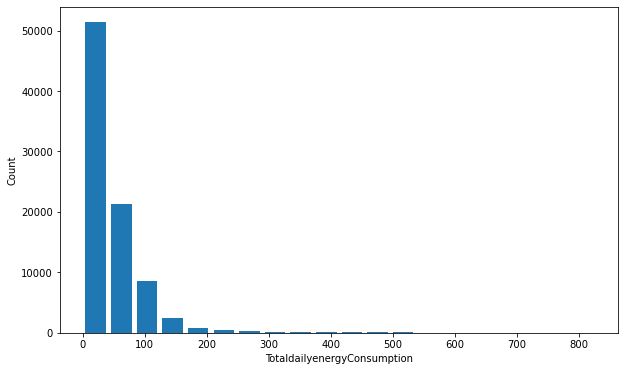

In [20]:
plt.hist(energy_data.TotaldailyenergyConsumption, bins=20, rwidth=0.8)
plt.xlabel('TotaldailyenergyConsumption')
plt.ylabel('Count')
plt.show()

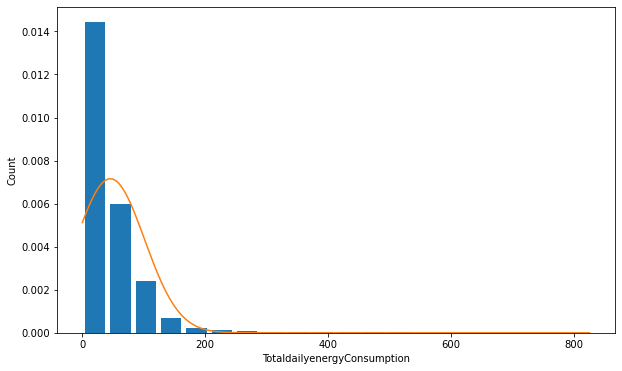

In [21]:
from scipy.stats import norm
import numpy as np
plt.hist(energy_data.TotaldailyenergyConsumption, bins=20, rwidth=0.8, density=True)
plt.xlabel('TotaldailyenergyConsumption')
plt.ylabel('Count')

rng = np.arange(energy_data.TotaldailyenergyConsumption.min(), energy_data.TotaldailyenergyConsumption.max(), 0.1)
plt.plot(rng, norm.pdf(rng,energy_data.TotaldailyenergyConsumption.mean(),energy_data.TotaldailyenergyConsumption.std()))

In [22]:
energy_data.TotaldailyenergyConsumption.mean()

45.583220350779506

In [23]:
energy_data.TotaldailyenergyConsumption.std()

55.754257804499254

In [24]:
upper_limit = energy_data.TotaldailyenergyConsumption.mean() + 3*energy_data.TotaldailyenergyConsumption.std()
upper_limit

212.84599376427727

In [25]:
lower_limit = energy_data.TotaldailyenergyConsumption.mean() - 3*energy_data.TotaldailyenergyConsumption.std()
lower_limit

-121.67955306271827

In [26]:
energy_data[(energy_data.TotaldailyenergyConsumption>upper_limit) | (energy_data.TotaldailyenergyConsumption<lower_limit)]

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,2.00 PM,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM
1487,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Autumn,2022-05-21,245.46,...,10.94,11.05,8.23,15.00,13.74,10.71,11.47,11.40,9.82,7.97
1493,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Autumn,2022-05-27,219.91,...,8.64,7.79,8.20,8.84,9.94,13.15,12.51,9.02,12.46,13.37
1496,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Autumn,2022-05-30,220.74,...,11.30,10.06,8.45,7.75,7.92,13.82,13.65,10.00,11.86,10.00
1502,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-06-05,232.14,...,11.11,10.87,8.51,10.09,12.47,15.14,11.46,13.28,11.51,10.50
1507,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-06-10,222.29,...,7.96,10.82,12.37,13.51,14.03,12.66,10.82,12.31,12.60,8.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69456,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-07,261.08,...,7.96,11.00,8.28,10.08,8.60,11.88,11.80,12.84,13.08,14.52
69457,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-08,240.16,...,6.92,7.04,7.84,8.92,5.52,11.84,10.48,11.64,8.56,5.60
69459,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-10,216.32,...,11.36,7.32,5.52,9.08,7.24,6.60,6.28,10.64,15.04,17.08
69460,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-11,212.88,...,9.12,9.44,5.72,8.60,4.12,6.52,7.56,8.16,9.44,5.84


In [27]:
df_no_outlier_std_dev = energy_data[(energy_data.TotaldailyenergyConsumption<upper_limit) & (energy_data.TotaldailyenergyConsumption>lower_limit)]
df_no_outlier_std_dev.head()

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,2.00 PM,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM
0,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-01,9.32,...,1.39,0.12,0.12,1.03,0.12,0.13,0.14,0.14,0.14,0.63
1,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-02,9.19,...,0.75,0.92,0.12,0.12,0.12,1.04,0.14,0.14,0.14,0.14
2,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-03,9.57,...,0.12,2.01,0.55,0.12,0.13,0.14,0.14,0.14,1.03,0.14
3,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-04,8.63,...,0.12,0.29,1.25,0.12,1.03,0.14,0.14,0.14,0.14,0.14
4,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-05,9.58,...,1.01,1.08,0.57,0.12,0.14,0.14,0.14,1.04,0.14,0.14


In [28]:
df_no_outlier_std_dev.shape

(84816, 34)

In [29]:
energy_data.shape

(86208, 34)

In [30]:
energy_data['zscore'] = ( energy_data.TotaldailyenergyConsumption - energy_data.TotaldailyenergyConsumption.mean() ) / energy_data.TotaldailyenergyConsumption.std()
energy_data.head(5)

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM,zscore
0,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-01,9.32,...,0.12,0.12,1.03,0.12,0.13,0.14,0.14,0.14,0.63,-0.650412
1,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-02,9.19,...,0.92,0.12,0.12,0.12,1.04,0.14,0.14,0.14,0.14,-0.652743
2,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-03,9.57,...,2.01,0.55,0.12,0.13,0.14,0.14,0.14,1.03,0.14,-0.645928
3,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-04,8.63,...,0.29,1.25,0.12,1.03,0.14,0.14,0.14,0.14,0.14,-0.662787
4,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-05,9.58,...,1.08,0.57,0.12,0.14,0.14,0.14,1.04,0.14,0.14,-0.645748


In [31]:
energy_data[(energy_data.zscore<-3) | (energy_data.zscore>3)]

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM,zscore
1487,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Autumn,2022-05-21,245.46,...,11.05,8.23,15.00,13.74,10.71,11.47,11.40,9.82,7.97,3.584960
1493,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Autumn,2022-05-27,219.91,...,7.79,8.20,8.84,9.94,13.15,12.51,9.02,12.46,13.37,3.126699
1496,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Autumn,2022-05-30,220.74,...,10.06,8.45,7.75,7.92,13.82,13.65,10.00,11.86,10.00,3.141586
1502,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-06-05,232.14,...,10.87,8.51,10.09,12.47,15.14,11.46,13.28,11.51,10.50,3.346054
1507,0000002355DE9ED,Residential College,"Connection 1, 69 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Mahuru House,J126,Term Time,Winter,2022-06-10,222.29,...,10.82,12.37,13.51,14.03,12.66,10.82,12.31,12.60,8.86,3.169386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69456,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-07,261.08,...,11.00,8.28,10.08,8.60,11.88,11.80,12.84,13.08,14.52,3.865118
69457,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-08,240.16,...,7.04,7.84,8.92,5.52,11.84,10.48,11.64,8.56,5.60,3.489900
69459,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-10,216.32,...,7.32,5.52,9.08,7.24,6.60,6.28,10.64,15.04,17.08,3.062309
69460,0000200385DEF37,Residential College,"Connection 2, 110 Clyde Street, Dunedin, Otago...",Clyde street,Arana College - Denmead House,H633,Term Time,Spring,2022-11-11,212.88,...,9.44,5.72,8.60,4.12,6.52,7.56,8.16,9.44,5.84,3.000610


In [32]:
df_no_outliers = energy_data[(energy_data.zscore>-3) & (energy_data.zscore<3)]
df_no_outliers.head()

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM,zscore
0,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-01,9.32,...,0.12,0.12,1.03,0.12,0.13,0.14,0.14,0.14,0.63,-0.650412
1,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-02,9.19,...,0.92,0.12,0.12,0.12,1.04,0.14,0.14,0.14,0.14,-0.652743
2,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-03,9.57,...,2.01,0.55,0.12,0.13,0.14,0.14,0.14,1.03,0.14,-0.645928
3,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-04,8.63,...,0.29,1.25,0.12,1.03,0.14,0.14,0.14,0.14,0.14,-0.662787
4,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-05,9.58,...,1.08,0.57,0.12,0.14,0.14,0.14,1.04,0.14,0.14,-0.645748


In [33]:
df_no_outliers.shape

(84816, 35)

In [34]:
energy_data.shape

(86208, 35)

##Outlier detection and removal using z-score and standard deviation using hourly weather data

In [35]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

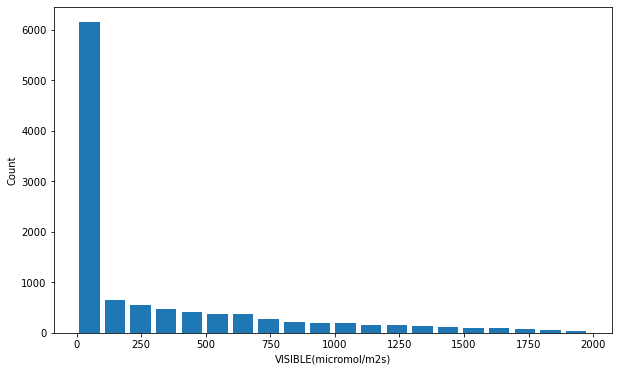

In [36]:
plt.hist(weather_data['VISIBLE(micromol/m2s)'], bins=20, rwidth=0.8)
plt.xlabel('VISIBLE(micromol/m2s)')
plt.ylabel('Count')
plt.show()

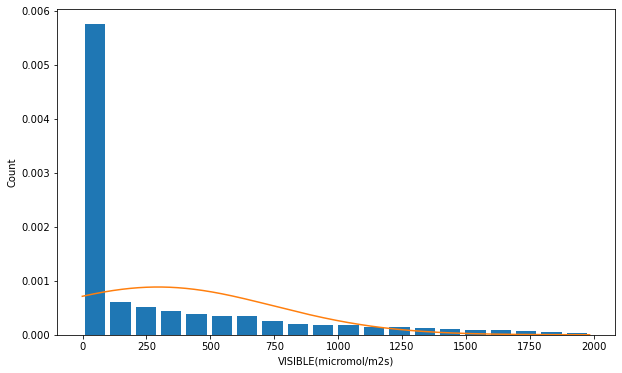

In [37]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
plt.hist(weather_data['VISIBLE(micromol/m2s)'], bins=20, rwidth=0.8, density=True)
plt.xlabel('VISIBLE(micromol/m2s)')
plt.ylabel('Count')

rng = np.arange(weather_data['VISIBLE(micromol/m2s)'].min(), weather_data['VISIBLE(micromol/m2s)'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, weather_data['VISIBLE(micromol/m2s)'].mean(), weather_data['VISIBLE(micromol/m2s)'].std()))

plt.show()

In [38]:
weather_data['VISIBLE(micromol/m2s)'].mean()

295.27048904974015

In [39]:
weather_data['VISIBLE(micromol/m2s)'].std()

450.6658248729786

In [40]:
upper_limit = weather_data['VISIBLE(micromol/m2s)'].mean() + 3*weather_data['VISIBLE(micromol/m2s)'].std()
upper_limit

1647.2679636686757

In [41]:
lower_limit = weather_data['VISIBLE(micromol/m2s)'].mean() - 3*weather_data['VISIBLE(micromol/m2s)'].std()
lower_limit

-1056.7269855691957

In [42]:
weather_data[(weather_data['VISIBLE(micromol/m2s)'] > upper_limit) | (weather_data['VISIBLE(micromol/m2s)'] < lower_limit)]

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime
35,2/01/2022,11:00 AM,22.70,59.08,2.95,147.83,831.08,25.57,2.21,1667.17,0.0,1013.00,4.05,2022-01-02 11:00:00
36,2/01/2022,12:00 PM,23.99,56.75,2.76,156.83,872.67,27.42,2.42,1748.42,0.0,1013.00,4.23,2022-01-02 12:00:00
37,2/01/2022,1:00 PM,24.55,57.08,3.48,134.75,898.08,27.90,2.44,1796.75,0.0,1012.42,5.49,2022-01-02 13:00:00
59,3/01/2022,11:00 AM,22.06,54.58,3.20,157.00,874.58,27.17,2.40,1775.17,0.0,1013.00,4.49,2022-01-03 11:00:00
61,3/01/2022,1:00 PM,22.73,51.17,5.05,65.17,865.33,27.73,2.47,1754.83,0.0,1013.00,7.25,2022-01-03 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,11/02/2023,12:00 PM,18.88,43.92,6.39,53.58,866.92,27.27,2.92,1722.83,0.0,1014.58,8.76,2023-02-11 12:00:00
9757,11/02/2023,1:00 PM,18.57,45.83,7.69,56.58,860.58,27.18,2.89,1708.25,0.0,1014.00,10.70,2023-02-11 13:00:00
9780,12/02/2023,12:00 PM,21.39,60.42,4.93,48.25,853.83,27.59,2.98,1705.75,0.0,1007.58,7.14,2023-02-12 12:00:00
9804,13/02/2023,12:00 PM,20.71,58.83,6.96,32.33,860.42,27.12,2.94,1706.50,0.0,1002.00,9.91,2023-02-13 12:00:00


In [43]:
df_no_outlier_std_dev = weather_data[(weather_data['VISIBLE(micromol/m2s)']<upper_limit) & (weather_data['VISIBLE(micromol/m2s)']>lower_limit)]
df_no_outlier_std_dev.head()

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime
0,1/01/2022,12:00 AM,15.02,73.50,1.53,118.25,0.81,0.00,0.01,0.00,0.0,1003.58,2.28,2022-01-01 00:00:00
1,1/01/2022,01:00 AM,15.28,77.08,1.22,213.08,0.80,0.00,0.01,0.00,0.0,1004.75,1.80,2022-01-01 01:00:00
2,1/01/2022,02:00 AM,14.02,81.75,2.88,94.25,0.80,0.00,0.01,0.00,0.0,1005.00,3.42,2022-01-01 02:00:00
3,1/01/2022,03:00 AM,12.88,86.58,2.91,12.50,0.80,0.00,0.01,0.00,0.0,1005.83,3.39,2022-01-01 03:00:00
4,1/01/2022,04:00 AM,12.42,88.25,2.66,67.50,1.74,0.03,0.01,2.25,0.0,1006.75,3.33,2022-01-01 04:00:00


In [44]:
df_no_outlier_std_dev.shape

(10567, 14)

In [45]:
weather_data.shape

(10776, 14)

In [46]:
weather_data['zscore'] = ( weather_data['VISIBLE(micromol/m2s)']- weather_data['VISIBLE(micromol/m2s)'].mean() ) / weather_data['VISIBLE(micromol/m2s)'].std()
weather_data.head(5)

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime,zscore
0,1/01/2022,12:00 AM,15.02,73.50,1.53,118.25,0.81,0.00,0.01,0.00,0.0,1003.58,2.28,2022-01-01 00:00:00,-0.655187
1,1/01/2022,01:00 AM,15.28,77.08,1.22,213.08,0.80,0.00,0.01,0.00,0.0,1004.75,1.80,2022-01-01 01:00:00,-0.655187
2,1/01/2022,02:00 AM,14.02,81.75,2.88,94.25,0.80,0.00,0.01,0.00,0.0,1005.00,3.42,2022-01-01 02:00:00,-0.655187
3,1/01/2022,03:00 AM,12.88,86.58,2.91,12.50,0.80,0.00,0.01,0.00,0.0,1005.83,3.39,2022-01-01 03:00:00,-0.655187
4,1/01/2022,04:00 AM,12.42,88.25,2.66,67.50,1.74,0.03,0.01,2.25,0.0,1006.75,3.33,2022-01-01 04:00:00,-0.650195


In [47]:
weather_data[(weather_data.zscore<-3) | (weather_data.zscore>3)]

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime,zscore
35,2/01/2022,11:00 AM,22.70,59.08,2.95,147.83,831.08,25.57,2.21,1667.17,0.0,1013.00,4.05,2022-01-02 11:00:00,3.044161
36,2/01/2022,12:00 PM,23.99,56.75,2.76,156.83,872.67,27.42,2.42,1748.42,0.0,1013.00,4.23,2022-01-02 12:00:00,3.224450
37,2/01/2022,1:00 PM,24.55,57.08,3.48,134.75,898.08,27.90,2.44,1796.75,0.0,1012.42,5.49,2022-01-02 13:00:00,3.331692
59,3/01/2022,11:00 AM,22.06,54.58,3.20,157.00,874.58,27.17,2.40,1775.17,0.0,1013.00,4.49,2022-01-03 11:00:00,3.283807
61,3/01/2022,1:00 PM,22.73,51.17,5.05,65.17,865.33,27.73,2.47,1754.83,0.0,1013.00,7.25,2022-01-03 13:00:00,3.238674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,11/02/2023,12:00 PM,18.88,43.92,6.39,53.58,866.92,27.27,2.92,1722.83,0.0,1014.58,8.76,2023-02-11 12:00:00,3.167668
9757,11/02/2023,1:00 PM,18.57,45.83,7.69,56.58,860.58,27.18,2.89,1708.25,0.0,1014.00,10.70,2023-02-11 13:00:00,3.135315
9780,12/02/2023,12:00 PM,21.39,60.42,4.93,48.25,853.83,27.59,2.98,1705.75,0.0,1007.58,7.14,2023-02-12 12:00:00,3.129768
9804,13/02/2023,12:00 PM,20.71,58.83,6.96,32.33,860.42,27.12,2.94,1706.50,0.0,1002.00,9.91,2023-02-13 12:00:00,3.131432


In [48]:
df_no_outliers = weather_data[(weather_data.zscore>-3) & (weather_data.zscore<3)]
df_no_outliers.head()

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime,zscore
0,1/01/2022,12:00 AM,15.02,73.50,1.53,118.25,0.81,0.00,0.01,0.00,0.0,1003.58,2.28,2022-01-01 00:00:00,-0.655187
1,1/01/2022,01:00 AM,15.28,77.08,1.22,213.08,0.80,0.00,0.01,0.00,0.0,1004.75,1.80,2022-01-01 01:00:00,-0.655187
2,1/01/2022,02:00 AM,14.02,81.75,2.88,94.25,0.80,0.00,0.01,0.00,0.0,1005.00,3.42,2022-01-01 02:00:00,-0.655187
3,1/01/2022,03:00 AM,12.88,86.58,2.91,12.50,0.80,0.00,0.01,0.00,0.0,1005.83,3.39,2022-01-01 03:00:00,-0.655187
4,1/01/2022,04:00 AM,12.42,88.25,2.66,67.50,1.74,0.03,0.01,2.25,0.0,1006.75,3.33,2022-01-01 04:00:00,-0.650195


In [49]:
df_no_outliers.shape

(10567, 15)

In [50]:
weather_data.shape

(10776, 15)

##Outlier Detection and Removal Using IQR for processed energy data

In [51]:
Q1 = energy_data.TotaldailyenergyConsumption.quantile(0.25)
Q3 = energy_data.TotaldailyenergyConsumption.quantile(0.75)
Q1, Q3

(8.31, 63.21)

In [52]:
IQR = Q3 - Q1
IQR

54.9

In [53]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-74.03999999999999, 145.56)

In [54]:
energy_data[(energy_data.TotaldailyenergyConsumption<lower_limit)|(energy_data.TotaldailyenergyConsumption>upper_limit)]

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM,zscore
191,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,Winter,2022-07-11,146.92,...,4.47,6.32,6.13,6.23,5.52,4.70,6.84,9.01,9.05,1.817561
192,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,Winter,2022-07-12,179.85,...,4.73,6.58,9.34,6.79,10.87,11.16,10.83,9.97,9.79,2.408189
194,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,Winter,2022-07-14,160.41,...,4.56,10.33,10.98,10.15,12.10,8.95,6.46,8.31,6.96,2.059516
197,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,Winter,2022-07-17,179.27,...,3.28,5.23,9.24,7.90,7.49,7.52,9.38,8.77,10.03,2.397786
198,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,Winter,2022-07-18,146.33,...,3.73,3.99,8.95,9.81,5.47,5.74,7.42,10.21,6.71,1.806979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84617,0000206661DE442,University Flats,A 118 DUNDAS STREET DUNEDIN Otago 9016,Dundas street,Otago University Flat,A-118,Term Time,Winter,2022-07-25,147.86,...,4.38,6.31,8.28,6.70,6.79,8.68,6.61,5.77,5.99,1.834421
84633,0000206661DE442,University Flats,A 118 DUNDAS STREET DUNEDIN Otago 9016,Dundas street,Otago University Flat,A-118,Term Time,Winter,2022-08-10,149.56,...,3.73,5.31,5.44,6.60,8.59,8.75,6.96,6.64,6.39,1.864912
84658,0000206661DE442,University Flats,A 118 DUNDAS STREET DUNEDIN Otago 9016,Dundas street,Otago University Flat,A-118,Term Time,Spring,2022-09-04,155.28,...,5.82,7.23,7.57,8.01,8.92,8.92,7.61,5.81,7.94,1.967505
84690,0000206661DE442,University Flats,A 118 DUNDAS STREET DUNEDIN Otago 9016,Dundas street,Otago University Flat,A-118,Term Time,Spring,2022-10-06,148.27,...,6.76,6.72,6.64,6.43,7.06,4.69,4.24,6.04,7.31,1.841775


In [55]:
df_no_outlier = energy_data[(energy_data.TotaldailyenergyConsumption>lower_limit)&(energy_data.TotaldailyenergyConsumption<upper_limit)]
df_no_outlier

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM,zscore
0,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-01,9.32,...,0.12,0.12,1.03,0.12,0.13,0.14,0.14,0.14,0.63,-0.650412
1,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-02,9.19,...,0.92,0.12,0.12,0.12,1.04,0.14,0.14,0.14,0.14,-0.652743
2,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-03,9.57,...,2.01,0.55,0.12,0.13,0.14,0.14,0.14,1.03,0.14,-0.645928
3,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2022-01-04,8.63,...,0.29,1.25,0.12,1.03,0.14,0.14,0.14,0.14,0.14,-0.662787
4,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,2022-01-05,9.58,...,1.08,0.57,0.12,0.14,0.14,0.14,1.04,0.14,0.14,-0.645748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86203,0000505443DE47E,Residential College,"RESIDENCE, House, 660 Castle Street North, Dun...",Castle Street,Otago University Flat,K401,Term Time,Autumn,2023-03-21,36.38,...,0.55,1.44,2.50,2.37,2.24,3.91,3.23,2.15,1.39,-0.165068
86204,0000505443DE47E,Residential College,"RESIDENCE, House, 660 Castle Street North, Dun...",Castle Street,Otago University Flat,K401,Term Time,Autumn,2023-03-22,49.55,...,1.40,2.22,1.34,2.72,2.26,1.60,1.52,1.86,3.07,0.071148
86205,0000505443DE47E,Residential College,"RESIDENCE, House, 660 Castle Street North, Dun...",Castle Street,Otago University Flat,K401,Term Time,Autumn,2023-03-23,52.62,...,1.58,0.82,1.27,1.39,1.79,1.08,1.03,4.27,4.00,0.126211
86206,0000505443DE47E,Residential College,"RESIDENCE, House, 660 Castle Street North, Dun...",Castle Street,Otago University Flat,K401,Term Time,Autumn,2023-03-24,44.56,...,1.09,0.79,0.81,1.66,3.66,1.31,2.25,2.41,1.27,-0.018352


In [56]:
##Outlier Detection and Removal Using IQR for hourly weather data

In [57]:
Q1 = weather_data['VISIBLE(micromol/m2s)'].quantile(0.25)
Q3 = weather_data['VISIBLE(micromol/m2s)'].quantile(0.75)
Q1, Q3

(0.83, 460.355)

In [58]:
IQR = Q3 - Q1
IQR

459.52500000000003

In [59]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-688.4575, 1149.6425)

In [60]:
weather_data[(weather_data['VISIBLE(micromol/m2s)']<lower_limit)|(weather_data['VISIBLE(micromol/m2s)']>upper_limit)]

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime,zscore
16,1/01/2022,4:00 PM,16.67,73.42,5.73,264.08,690.63,19.93,1.40,1392.50,0.0,1013.00,8.21,2022-01-01 16:00:00,2.434685
34,2/01/2022,10:00 AM,21.69,61.67,1.84,165.08,597.36,18.82,1.56,1195.67,0.0,1013.92,2.45,2022-01-02 10:00:00,1.997932
35,2/01/2022,11:00 AM,22.70,59.08,2.95,147.83,831.08,25.57,2.21,1667.17,0.0,1013.00,4.05,2022-01-02 11:00:00,3.044161
36,2/01/2022,12:00 PM,23.99,56.75,2.76,156.83,872.67,27.42,2.42,1748.42,0.0,1013.00,4.23,2022-01-02 12:00:00,3.224450
37,2/01/2022,1:00 PM,24.55,57.08,3.48,134.75,898.08,27.90,2.44,1796.75,0.0,1012.42,5.49,2022-01-02 13:00:00,3.331692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597,18/03/2023,1:00 PM,19.25,48.08,3.42,108.08,599.53,18.43,1.80,1177.83,0.0,1012.00,4.72,2023-03-18 13:00:00,1.958346
10619,19/03/2023,11:00 AM,22.00,38.42,3.78,88.33,645.13,19.30,1.89,1286.83,0.0,1013.67,5.69,2023-03-19 11:00:00,2.200210
10620,19/03/2023,12:00 PM,22.57,40.17,3.85,101.08,672.07,20.79,2.08,1341.33,0.0,1012.92,5.98,2023-03-19 12:00:00,2.321142
10739,24/03/2023,11:00 AM,16.78,59.50,3.23,122.58,603.77,17.21,1.62,1200.75,0.0,1014.00,4.46,2023-03-24 11:00:00,2.009204


In [61]:
df_no_outlier = weather_data[(weather_data['VISIBLE(micromol/m2s)']>lower_limit)&(weather_data['VISIBLE(micromol/m2s)']<upper_limit)]
df_no_outlier

,DATE(dd/mm/yy),TIME,TEMP(oC),RH(%),WINDSPD(m/s),WINDIR(degrees),GLOBAL(W/m2),UVA(W/m2),UVB(W/m2),VISIBLE(micromol/m2s),RAIN(mm),PRESS(hPa),MAXGUST(m/s),Datetime,zscore
0,1/01/2022,12:00 AM,15.02,73.50,1.53,118.25,0.81,0.00,0.01,0.00,0.0,1003.58,2.28,2022-01-01 00:00:00,-0.655187
1,1/01/2022,01:00 AM,15.28,77.08,1.22,213.08,0.80,0.00,0.01,0.00,0.0,1004.75,1.80,2022-01-01 01:00:00,-0.655187
2,1/01/2022,02:00 AM,14.02,81.75,2.88,94.25,0.80,0.00,0.01,0.00,0.0,1005.00,3.42,2022-01-01 02:00:00,-0.655187
3,1/01/2022,03:00 AM,12.88,86.58,2.91,12.50,0.80,0.00,0.01,0.00,0.0,1005.83,3.39,2022-01-01 03:00:00,-0.655187
4,1/01/2022,04:00 AM,12.42,88.25,2.66,67.50,1.74,0.03,0.01,2.25,0.0,1006.75,3.33,2022-01-01 04:00:00,-0.650195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10771,25/03/2023,7:00 PM,13.73,86.25,0.77,263.17,0.89,0.00,0.01,-0.08,0.0,1004.00,1.25,2023-03-25 19:00:00,-0.655365
10772,25/03/2023,8:00 PM,13.06,89.25,1.98,8.33,0.80,0.00,0.01,0.00,0.0,1005.00,2.41,2023-03-25 20:00:00,-0.655187
10773,25/03/2023,9:00 PM,13.30,87.58,1.22,258.33,0.80,0.00,0.01,0.00,0.0,1005.00,1.93,2023-03-25 21:00:00,-0.655187
10774,25/03/2023,10:00 PM,13.63,80.42,2.01,277.17,0.80,0.00,0.01,0.00,0.0,1005.58,3.35,2023-03-25 22:00:00,-0.655187


Confusion Matrix:
[[10162  2769]
 [ 4061  8871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     12931
           1       0.76      0.69      0.72     12932

    accuracy                           0.74     25863
   macro avg       0.74      0.74      0.74     25863
weighted avg       0.74      0.74      0.74     25863


Additional Metrics:
Accuracy: 0.74
Precision: 0.76
Recall: 0.69
F1 Score: 0.72
RMSE of probabilities: 0.42


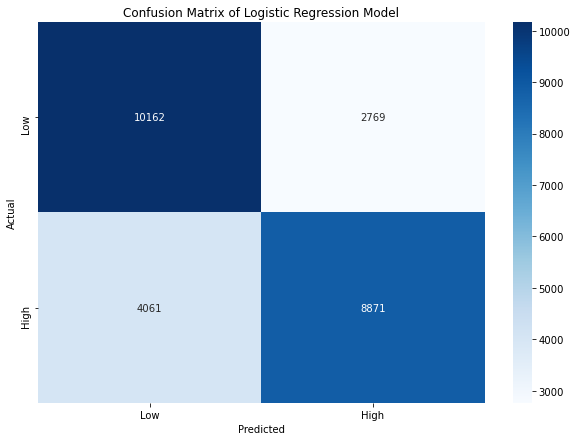

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions for classes
y_pred = logreg.predict(X_test)

# Predicting probabilities for RMSE calculation
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()


DecisionTree

Confusion Matrix:
[[10290  2641]
 [ 2137 10795]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     12931
           1       0.80      0.83      0.82     12932

    accuracy                           0.82     25863
   macro avg       0.82      0.82      0.82     25863
weighted avg       0.82      0.82      0.82     25863


Additional Metrics:
Accuracy: 0.82
Precision: 0.80
Recall: 0.83
F1 Score: 0.82
RMSE of probabilities: 0.36


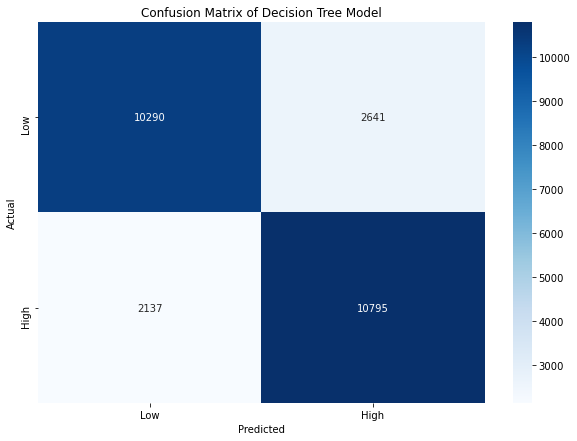

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree Model')
plt.show()


Random Forest

Confusion Matrix:
[[10301  2630]
 [ 2118 10814]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     12931
           1       0.80      0.84      0.82     12932

    accuracy                           0.82     25863
   macro avg       0.82      0.82      0.82     25863
weighted avg       0.82      0.82      0.82     25863


Additional Metrics:
Accuracy: 0.82
Precision: 0.80
Recall: 0.84
F1 Score: 0.82
RMSE of probabilities: 0.36


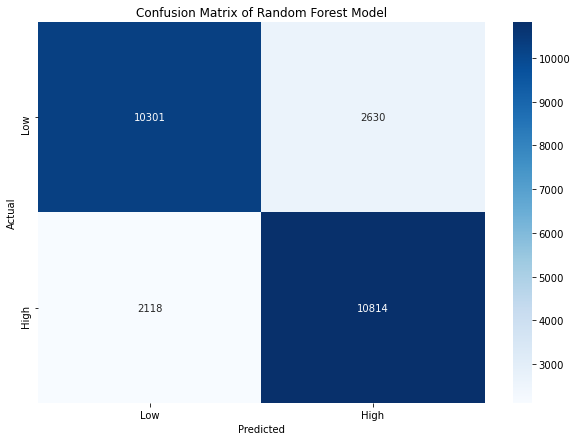

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier_random= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_random.fit(X_train, y_train)

y_pred= classifier_random.predict(X_test)

y_pred_proba = classifier_random.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()


SVM

Confusion Matrix:
[[10197  2734]
 [ 4045  8887]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     12931
           1       0.76      0.69      0.72     12932

    accuracy                           0.74     25863
   macro avg       0.74      0.74      0.74     25863
weighted avg       0.74      0.74      0.74     25863


Additional Metrics:
Accuracy: 0.74
Precision: 0.76
Recall: 0.69
F1 Score: 0.72
RMSE of probabilities: 0.51


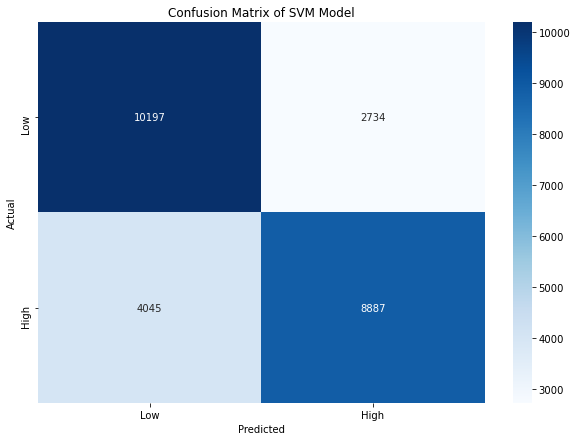

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier_SVC = SVC(kernel='linear', random_state=0)
classifier_SVC.fit(X_train, y_train)

y_pred= classifier_SVC.predict(X_test)

#y_pred_proba = classifier_SVC.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM Model')
plt.show()


Confusion Matrix:
[[ 9928  3003]
 [ 2260 10672]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     12931
           1       0.78      0.83      0.80     12932

    accuracy                           0.80     25863
   macro avg       0.80      0.80      0.80     25863
weighted avg       0.80      0.80      0.80     25863


Additional Metrics:
Accuracy: 0.80
Precision: 0.78
Recall: 0.83
F1 Score: 0.80
RMSE of probabilities: 0.45


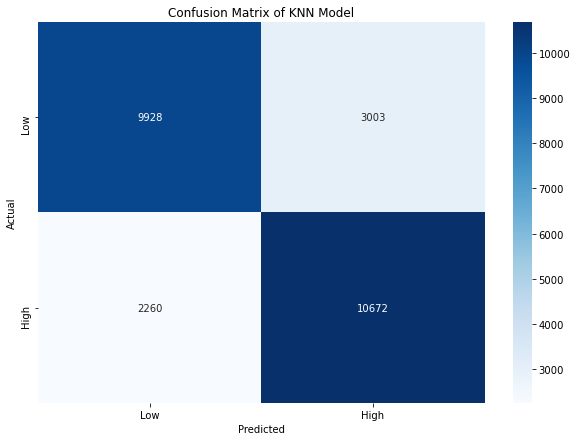

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier_KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier_KNN.fit(X_train, y_train)

y_pred= classifier_KNN.predict(X_test)

#y_pred_proba = classifier_SVC.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN Model')
plt.show()


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Results for Random Forest and Ridge Regressor
Logistic = {'Precision': 76, 'Recall': 69}
DecisionTree = {'Precision': 80, 'Recall': 83}
RandomForest ={'Precision': 80, 'Recall': 84}
SVC = {'Precision': 75, 'Recall': 73}
KNN ={'Precision': 78, 'Recall': 83}

# Assuming normal distribution for RMSE scores
np.random.seed(42)

Logistic = np.random.normal(Logistic['Precision'], Logistic['Recall'], 1000)
DecisionTree = np.random.normal(DecisionTree['Precision'], DecisionTree['Recall'], 1000)
RandomForest = np.random.normal(RandomForest['Precision'], RandomForest['Recall'], 1000)
SVC = np.random.normal(SVC['Precision'], SVC['Recall'], 1000)
KNN = np.random.normal(KNN['Precision'], KNN['Recall'], 1000)

# Create DataFrame for plotting
data_to_plot = {
    'Logistic': Logistic,
    'Decsion Tree': DecisionTree,
    'Random Forest': RandomForest,
    'SVM': SVC,
    'KNN': KNN
}
df = pd.DataFrame(data_to_plot)

# Plotting violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=df)
plt.title('Violin Plots for Precision Recall Scores')
plt.ylabel('RMSE')
# Adding gridlines
plt.grid(True)

# Show the plot
plt.show()


AttributeError: 'DataFrame' object has no attribute 'iteritems'

<Figure size 1080x576 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ['Logistic Regression', 'Desicion Tree', 'Random Forest', 'SVM', 'KNN']
accuracy = [74, 82, 82, 74, 80]

# Create a DataFrame
data = {'Model': models, 'Accuracy': accuracy}
df = pd.DataFrame(data)

# Plotting a bar plot
plt.figure(figsize=(8, 8))
plt.bar(df['Model'], df['Accuracy'], color='skyblue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy across Models')

# Show the plot
plt.show()
